https://keras.io/examples/nlp/pretrained_word_embeddings/

In [124]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [125]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [126]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
import matplotlib.pyplot as plt

import gensim
from gensim.models import Word2Vec,KeyedVectors

import logging
import nltk
from nltk.corpus import brown   
import os 

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
nltk.download('brown')

import csv
import transformers
from scipy.spatial.distance import cosine
import torch
from transformers import BertTokenizer, BertModel

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
#logging.basicConfig(level=logging.INFO)

import matplotlib.pyplot as plt
#% matplotlib inline

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\henry\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [127]:
# read the words from your WordData.csv file
def GetWords():
    words = []
    with open('DataFiles/WordData.csv', 'r') as f:       
        for line in f:
            if line.strip()=='Word':continue #Skip heading
            words.append(line.strip())
    return words

def GetWordPairs():
	words = []
	with open('DataFiles/PhraseData.csv', 'r') as f:  
		pair1, pair2 = [], []
		for line in f:
			if line.strip()=='Word':continue #Skip heading
			for phrase in f:
				phrase = phrase.split(" ")
				pair1.append([phrase[0], phrase[2]])
				pair1.append([phrase[1], phrase[3]])
		words.append([pair1])
	return words[0][0]

word_pairs = GetWordPairs()
print("First 5 Word Pairs: ")
print(word_pairs[:4])


words = GetWords()
print("\nFirst 5 Words: ")
words[0:5]

First 5 Word Pairs: 
[['development', 'action'], ['plan,', 'programme,'], ['training', 'education'], ['programme,', 'course,']]

First 5 Words: 


['development', 'plan', 'action', 'programme', 'training']

# Word2Vec

## Training

In [128]:
dimensions = [10,20,30,40,50,60,70,80,90] + list(np.arange(100,800,100))

In [129]:
sentences = brown.sents()
for vector_dims in dimensions:
	if not os.path.exists('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(vector_dims)):
		model = gensim.models.Word2Vec(sentences, min_count=1,vector_size=vector_dims, window=5, workers=4)
		model.save('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(vector_dims))
		print("Made Word2Vec Model of ", str(vector_dims), " dimensions")

In [130]:
model = Word2Vec.load('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(700))
print("First 10 dims of second word in 700 dims: ")
model.wv[words[1]][0:10]

2023-01-21 17:02:19,518 : INFO : loading Word2Vec object from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_700
2023-01-21 17:02:19,538 : INFO : loading wv recursively from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_700.wv.* with mmap=None
2023-01-21 17:02:19,539 : INFO : loading vectors from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_700.wv.vectors.npy with mmap=None
2023-01-21 17:02:19,715 : INFO : loading syn1neg from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_700.syn1neg.npy with mmap=None
2023-01-21 17:02:19,889 : INFO : setting ignored attribute cum_table to None
2023-01-21 17:02:20,210 : INFO : Word2Vec lifecycle event {'fname': 'C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_700', 'datetime': '2023-01-21T17:02:20.210161', 'gensim': '4.3.0', 'python': '3.10.8 (tags/v3.10.8:aaaf517, Oct 11 202

First 10 dims of second word in 700 dims: 


array([ 0.04635248,  0.09131659, -0.09650849,  0.2753113 , -0.16141367,
       -0.2004109 ,  0.05806495,  0.23120125,  0.02272628,  0.13151366],
      dtype=float32)

## Testing

Missing Words from the Corpus

In [131]:
model = Word2Vec.load('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(700))
"""print("Missing (removed) Words:")
for word in words:
	try:
		model.wv[word]
	except:
		print(word)
		words.remove(word)"""

def GetWord2Vec_Vector(model, word):
	 return model.wv[word]

# Make word pairs:
pairs = []
for i in range(int(len(words)/2 +1)):
	pairs.append([words[i], words[i+1]])
	i+=1
print("Example Pairs:")
pairs[0:3]

2023-01-21 17:02:22,869 : INFO : loading Word2Vec object from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_700
2023-01-21 17:02:22,881 : INFO : loading wv recursively from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_700.wv.* with mmap=None
2023-01-21 17:02:22,882 : INFO : loading vectors from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_700.wv.vectors.npy with mmap=None
2023-01-21 17:02:22,974 : INFO : loading syn1neg from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_700.syn1neg.npy with mmap=None
2023-01-21 17:02:23,054 : INFO : setting ignored attribute cum_table to None
2023-01-21 17:02:23,387 : INFO : Word2Vec lifecycle event {'fname': 'C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_700', 'datetime': '2023-01-21T17:02:23.387532', 'gensim': '4.3.0', 'python': '3.10.8 (tags/v3.10.8:aaaf517, Oct 11 202

Example Pairs:


[['development', 'plan'], ['plan', 'action'], ['action', 'programme']]

In [132]:
model_100 = Word2Vec.load('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(100))
model_600 = Word2Vec.load('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(600))
model_700 = Word2Vec.load('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(700))
np.dot(model_100.wv[words[1]],model_100.wv[words[2]]), np.dot(model_600.wv[words[1]],model_600.wv[words[2]]), np.dot(model_700.wv[words[1]],model_700.wv[words[2]])

2023-01-21 17:02:28,002 : INFO : loading Word2Vec object from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_100
2023-01-21 17:02:28,060 : INFO : loading wv recursively from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_100.wv.* with mmap=None
2023-01-21 17:02:28,061 : INFO : setting ignored attribute cum_table to None
2023-01-21 17:02:28,400 : INFO : Word2Vec lifecycle event {'fname': 'C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_100', 'datetime': '2023-01-21T17:02:28.400426', 'gensim': '4.3.0', 'python': '3.10.8 (tags/v3.10.8:aaaf517, Oct 11 2022, 16:50:30) [MSC v.1933 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19044-SP0', 'event': 'loaded'}
2023-01-21 17:02:28,409 : INFO : loading Word2Vec object from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_600
2023-01-21 17:02:28,428 : INFO : loading wv recursively from C:\Users\henry\Desktop\M

(20.451641, 20.383715, 20.330574)

In [38]:
dot_prds = []
for dims in dimensions:
	model = Word2Vec.load('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(dims))
	dim_dot_prod = []
	for pair in pairs:
		dim_dot_prod.append(cosine(model.wv[pair[0]],model.wv[pair[1]]))
	dot_prds.append(dim_dot_prod)
dot_prods = np.array(dot_prds)
dot_prods.shape

2023-01-21 12:41:29,972 : INFO : loading Word2Vec object from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_10
2023-01-21 12:41:29,989 : INFO : loading wv recursively from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_10.wv.* with mmap=None
2023-01-21 12:41:29,991 : INFO : setting ignored attribute cum_table to None
2023-01-21 12:41:30,361 : INFO : Word2Vec lifecycle event {'fname': 'C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_10', 'datetime': '2023-01-21T12:41:30.361789', 'gensim': '4.3.0', 'python': '3.10.8 (tags/v3.10.8:aaaf517, Oct 11 2022, 16:50:30) [MSC v.1933 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19044-SP0', 'event': 'loaded'}
2023-01-21 12:41:30,394 : INFO : loading Word2Vec object from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_20
2023-01-21 12:41:30,415 : INFO : loading wv recursively from C:\Users\henry\Desktop\Maste

(16, 70)

Text(0, 0.5, 'Percentage Change from current dimension to 700')

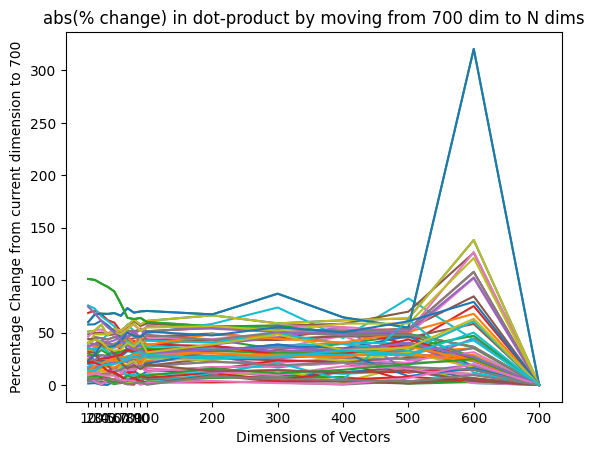

In [135]:
for word_dotprod in dot_prods.T:
	scaled_line = []
	for i, val in reversed(list(enumerate(word_dotprod))):
		try:
			if i == 0:
				scaled_line.append(val - val)
			else:
				scaled_line.append(100*abs((word_dotprod[0] - val)/word_dotprod[i-1]))
		except:
			pass
	plt.plot(dimensions, scaled_line)
plt.title("abs(% change) in dot-product by moving from 700 dim to N dims")
plt.xticks(dimensions)
plt.xlabel("Dimensions of Vectors")
plt.ylabel("Percentage Change from current dimension to 700")

# BERT

In [137]:
class BertEncodingWords():
	#https://colab.research.google.com/drive/1yFphU6PW9Uo6lmDly_ud9a6c4RCYlwdX#scrollTo=Zn0n2S-FWZih
	
	def __init__(self, data):
		# Load pre-trained model tokenizer (vocabulary)
		self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
		self.words = data
		self.model = BertModel.from_pretrained('bert-base-uncased',output_hidden_states = True).eval()# output_hidden_states is whether the model returns all hidden-states. # Put the model in "evaluation" mode, meaning feed-forward operation. 
		pass
	
	def getWordEmbedding(self, word):
		marked_text = "[CLS] " + word + " [SEP]"
		tokenized_text = self.tokenizer.tokenize(marked_text)	# Tokenize our sentence with the BERT tokenizer.
		return(tokenized_text)	# Print out the tokens.
	
	def preprocessSentence(self, word):
		# Add the special tokens.
		tokenized_text = self.getWordEmbedding(word)
		# Map the token strings to their vocabulary indeces.
		indexed_tokens = self.tokenizer.convert_tokens_to_ids(tokenized_text)

		# Mark each of the 22 tokens as belonging to sentence "1".
		segments_ids = [1] * len(tokenized_text)

		# Convert inputs to PyTorch tensors
		tokens_tensor = torch.tensor([indexed_tokens])
		segments_tensors = torch.tensor([segments_ids])
		return tokens_tensor, segments_tensors
	
	def hiddenLayersBERT(self, word):
		hidden_states = [] 
		with torch.no_grad():
			outputs = self.model(word[0])
			# https://huggingface.co/transformers/model_doc/bert.html#bertmodel
			hidden_states.append(outputs[2])
		return hidden_states

	def GetEmbeddingsForWord(self, hidden):
		# Stores the token vectors, with shape [22 x 768]
		token_vecs_sum = []

		# `token_embeddings` is a [22 x 12 x 768] tensor.

		# For each token in the sentence...
		for token in hidden:
			# `token` is a [12 x 768] tensor
			# Sum the vectors from the last four layers.
			sum_vec = torch.sum(token[0][0], dim=0)
			
			# Use `sum_vec` to represent `token`.
			token_vecs_sum.append(sum_vec)
		token_embedding_list = token_vecs_sum
		return token_embedding_list
	
	def GetTokenVecSum(self, hidden_state):
		# Stores the token vectors, with shape [22 x 768]
		token_vecs_cum_sum = []

		# `token_embeddings` is a [22 x 12 x 768] tensor.

		# For each token in the sentence...
		for token in hidden_state:

			# `token` is a [12 x 768] tensor
			# Sum the vectors from the last four layers.
			sum_vec = torch.sum(token[0][0], dim=0)
			
			# Use `sum_vec` to represent `token`.
			token_vecs_cum_sum.append(sum_vec)
		token_vecs_sum = token_vecs_cum_sum
		return token_vecs_sum

	def getWordVector(self, word):
		word_to_evaluate = self.preprocessSentence(word)
		hidden = self.hiddenLayersBERT(word_to_evaluate)
		embeddings = self.GetEmbeddingsForWord(hidden)
		return np.array(embeddings[0])

	
	def evaluateWordPair(self, row_numbers):
		sents_to_evaluate = [self.preprocessSentence(self.words[row_numbers[0]]), self.preprocessSentence(self.words[row_numbers[1]])]
		hidden = self.hiddenLayersBERT(sents_to_evaluate)
		embeddings = self.GetEmbeddingsForBothWords(hidden)
		return cosine(embeddings[1][0], embeddings[1][1])

	def evaluateAllSentPairs(self):
			res = []
			word_list = GetWords()
			for idx, word in enumerate(word_list):
				if idx % 2 == 0:
					try:
						res.append(1 - cosine(self.getWordVector(word), self.getWordVector(word_list[idx+1])))
					except:
						continue
				else:
					continue
			return res
	
	def GetAllBERTVectors(self):
		res = []
		word_list = GetWords()
		for idx, word in enumerate(word_list):
			try:
				res.append(self.getWordVector(word))
			except:
				continue
		return res

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Text(0, 0.5, 'Cosine Similarity')

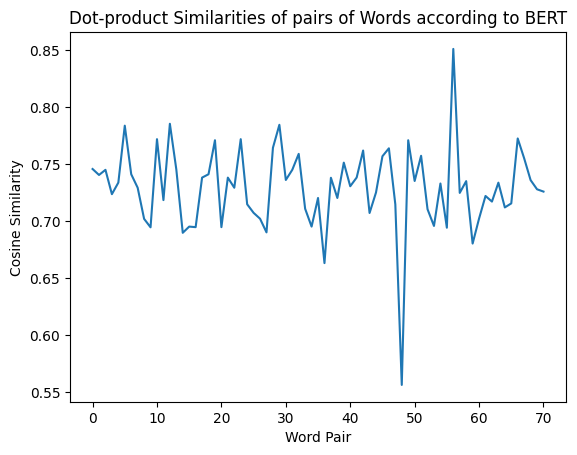

In [138]:
sentences = brown.sents()
bertWwords = BertEncodingWords(GetWords())

similarities = evaluateAllSentPairs()
plt.plot(similarities)
plt.title("Dot-product Similarities of pairs of Words according to BERT")
plt.xlabel("Word Pair")
plt.ylabel("Cosine Similarity")

# Comparisons

In [17]:
sentences = brown.sents()
BERT = BertEncodingWords(GetWords())

W2V = Word2Vec.load('C:\\Users\\henry\\Desktop\\MastersProject\\QNLP_MasterWork\\Word2VecModels\\brown_model_'+str(700))

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
2023-01-21 12:24:17,155 : INFO : loading Word2Vec object from C:\Users\henry\Desktop\MastersProject\QNLP_MasterWork\Word2VecModels\brown_model_700
2023-01-

In [67]:
BERT_dots = dict()
W2V_dots = dict()
for pair in word_pairs:
	try:#Try accept as some words do not work in the W2V eg:W2V.wv['plan'] -> Error
		W2V_dots.update({pair[0]+" "+pair[1]:1 - cosine(GetWord2Vec_Vector(W2V, pair[0]), GetWord2Vec_Vector(W2V, pair[1]))})
		BERT_dots.update({pair[0]+" "+pair[1]:1 - cosine(BERT.getWordVector(pair[0]), BERT.getWordVector(pair[1]))})
		#print(pair[0], pair[1], len(BERT_dots), len(W2V_dots), np.round(W2V_dots[pair[0]+" "+pair[1]], 2), np.round(BERT_dots[pair[0]+" "+pair[1]], 2))
	except:continue

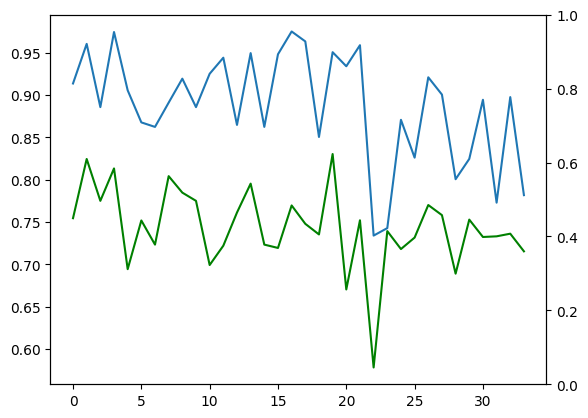

In [68]:
fig, ax = plt.subplots()

plt.plot(BERT_dots.values(), color='g')
ax2 = ax.twinx()
ax.plot(W2V_dots.values())

plt.draw()

# Rotations

In [192]:
rotated_words = dict()

for word in words:
	rotated_word_vector = []
	for comaprison_word in words:
		try:
			if word == comaprison_word: 
				continue
			else:
				rotated_word_vector.append(1-cosine(GetWord2Vec_Vector(W2V, word), GetWord2Vec_Vector(W2V, comaprison_word)))
		except:
			rotated_word_vector.append(0)
			continue
	normalized_rotated_vector = np.array(rotated_word_vector)-np.array(rotated_word_vector).mean()
	scaled_normalized_rotated_vector = np.interp(normalized_rotated_vector, (normalized_rotated_vector.min(), normalized_rotated_vector.max()), (-1, +1))
	rotated_words.update({str(word): scaled_normalized_rotated_vector})
	

In [79]:
word = 'board'
comaprison_word = 'market'
1-cosine(GetWord2Vec_Vector(W2V, word), GetWord2Vec_Vector(W2V, comaprison_word)), 1-cosine(rotated_words[word], rotated_words[comaprison_word]), len(rotated_words['board']),len(rotated_words['market']) 

(0.9252355694770813, 0.9608688263091362, 137, 137)

In [80]:
len(rotated_words['board']),len(rotated_words['market']) 

(137, 137)

In [218]:
list(rotated_words.keys())[0]

'development'

In [223]:
def evaluateAllSentPairs():
	res = []
	for idx, word in enumerate(rotated_words.keys()):
		if idx % 2 == 0:
			next_word_idx = idx+1
			next_word = list(rotated_words.keys())[next_word_idx]
			#print(rotated_words[word], rotated_words[next_word])
			try:
				#print(rotated_words[word], rotated_words[next_word])
				res.append(1 - cosine(rotated_words[word], rotated_words[next_word]))
			except:
				continue
		else:
			continue
	return res
			
rotated_similatities = evaluateAllSentPairs()
#plt.plot(rotated_words[word])
#plt.plot(GetWord2Vec_Vector(W2V, word))

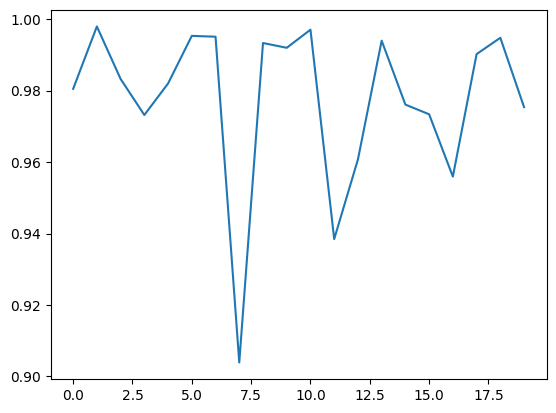

In [226]:
plt.plot(rotated_similatities)

# Single Value Decomposition

https://en.wikipedia.org/wiki/Singular_value_decomposition#:~:text=equivalent%20to%20zero.-,Low%2Drank%20matrix%20approximation,-%5Bedit%5D

In [172]:
def PerformSVD(A, N):
    # Perform SVD on the input vector
    U, D, Vt = np.linalg.svd(A)
    print(U.shape, D.shape, Vt.shape)
    # Select the first N columns of the U matrix
    U_reduced = U[:, :N]
    # Multiply the reduced U matrix with the S matrix
    A_reduced = np.dot(U_reduced, np.diag(D))
    return A_reduced

PerformSVD(np.array([[2,3, 9, 9, 9, 34,5, 4,5,6,44,5,6,4,3,9]]),1)

(1, 1) (1,) (16, 16)


array([[-60.14149982]])

In [173]:
from sklearn.decomposition import PCA

def DimReduceByPCA(input_array, new_dims):
	pca = PCA(n_components = new_dims)
	pca.fit(input_array)
	data_pca = pca.transform(input_array)
	return data_pca

In [174]:
bertWwords = BertEncodingWords(GetWords())
bertVectors = np.array(bertWwords.GetAllBERTVectors())
bertVectors.shape

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


(143, 768)

In [175]:
reduced_BERT_vec = DimReduceByPCA(bertVectors, 9)
cosine(reduced_BERT_vec[0], reduced_BERT_vec[1]), cosine(bertVectors[0], bertVectors[1])

(0.6237660646438599, 0.2544633746147156)

# Autoencoder

In [176]:
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input, Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [178]:
encoding_dim = 15 
input_img = Input(shape=(768,))
# encoded representation of input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# decoded representation of code 
decoded1 = Dense(768, activation='sigmoid')(encoded)
decoded2 = Dense(384, activation='sigmoid')(encoded)
decoded3 = Dense(96, activation='sigmoid')(encoded)
decoded4 = Dense(20, activation='sigmoid')(encoded)
# Model which take input image and shows decoded images
autoencoder = Model(input_img, [decoded1, decoded2, decoded3, decoded4])

# This model shows encoded images
encoder = Model(input_img, encoded)
# Creating a decoder model
encoded_input = Input(shape=(encoding_dim,))
# last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [189]:
x_train = bertVectors
x_train.shape

(143, 768)

In [190]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
print(x_train.shape)

(143, 768)


In [191]:
x_test.shape[1:]

(784,)